In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cosmic
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.sample.sampler import independent

## Start playing with the metallicity, duration, and the models

In [3]:
final_kstar1 = [10,11,12]
final_kstar2 = [10,11,12]

InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, binfrac_model=0.5, primary_model='kroupa01', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.9, size=100)

print(InitialBinaries)

    kstar_1  kstar_2    mass_1    mass_2           porb       ecc  \
0       1.0      1.0  1.894847  1.292045   31149.382807  0.066934   
1       1.0      1.0  0.812655  0.747478       5.891670  0.716019   
2       1.0      1.0  0.868671  0.782396      47.506131  0.147524   
3       1.0      1.0  4.095853  2.240686      35.934038  0.119973   
4       1.0      0.0  0.950153  0.525527  127873.495412  0.324871   
..      ...      ...       ...       ...            ...       ...   
95      1.0      1.0  1.816566  1.647527     130.706133  0.435064   
96      1.0      0.0  1.265911  0.601271       2.705123  0.105497   
97      1.0      0.0  0.931606  0.513726     143.447442  0.003229   
98      1.0      0.0  1.823457  0.583308      60.766101  0.493279   
99      1.0      1.0  0.954899  0.954725       3.078168  0.010508   

    metallicity   tphysf   mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  \
0          0.03  13700.0  1.894847  1.292045  ...     0.0     0.0      0.0   
1          0.03

In [4]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp' : 13700.0}

bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

print(bcm.iloc[:10])

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1       lum_1     rad_1        teff_1  \
0      0.0      1.0  1.894847  1.894847   13.431943  1.718517   8466.958968   
0  13700.0     11.0  0.536471  0.537927    0.000005  0.013652   2377.247606   
1      0.0      1.0  0.812655  0.812655    0.267086  0.753718   4800.958364   
1  13700.0      1.0  0.812655  0.812655    0.353314  0.823844   4924.783570   
2      0.0      1.0  0.868671  0.868671    0.370264  0.792305   5081.024636   
2  13700.0      1.0  0.868671  0.868671    0.536092  0.899454   5231.064013   
3      0.0      1.0  4.095853  4.095853  271.566339  2.638861  14488.731391   
3  13700.0     11.0  0.844374  0.844374    0.000004  0.009804   2569.639596   
4      0.0      1.0  0.950153  0.950153    0.575540  0.843634   5498.084408   
4  13700.0      1.0  0.950153  0.950153    1.054612  1.046745   5742.781307   

    massc_1    radc_1        menv_1  ...           porb           sep  \
0  0.000000  0.000000  1.000000e-10  ...   31149.382807  

In [5]:
#print(bpp)
#print(bcm)
mass1 = bcm.mass_1
m1 = np.array(mass1)
mass2 = bcm.mass_2
m2 = np.array(mass2)

In [6]:
tphys = bcm.tphys
Tphys = np.array(tphys)

In [7]:
final_mass1 = [m1[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
#print(final_mass1)
final_mass2 = [m2[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
#print(final_mass2)
f_m1 = pd.DataFrame(final_mass1)
f_m2 = pd.DataFrame(final_mass2)

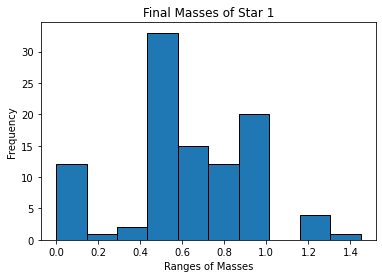

In [8]:
f_m1.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Final Masses of Star 1')
plt.xlabel('Ranges of Masses')
plt.show()

Text(0.5, 0, 'Range of Masses')

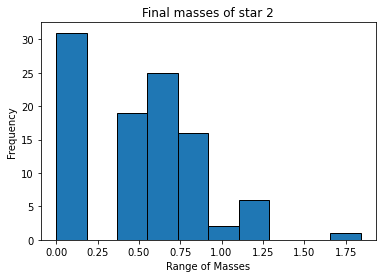

In [9]:
f_m2.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Final masses of star 2')
plt.xlabel('Range of Masses')

In [10]:
#Getting rid of any binary systems with a period of infinity
fperiod = bcm.porb
fp = np.array(fperiod)
f_period = [fp[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
f = [f_period[i] for i in range(len(f_period)) if f_period[i]!= np.Inf]
fp1 = pd.DataFrame(f)

Text(0.5, 0, 'Periods')

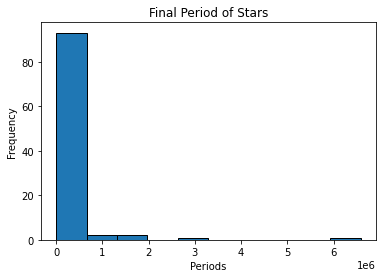

In [11]:
fp1.plot(kind='hist', edgecolor='black', legend=None)
plt.title('Final Period of Stars')
plt.xlabel('Periods')

# Change to 100,000 pop
# 